# Data Prepare Friends

This is Preparation of classification Bert modelling

In [1]:
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = '../../data/'

## Data Import

In [3]:
df_dlg = pd.read_csv(PATH_DATA+'friends_all_dialogue_semi_cln.csv')

## Creating Label

In [4]:
# char_dlg_cnt = df_dlg.character.value_counts()
# char_dlg_cnt[char_dlg_cnt>100].index.tolist()
char = ['rachel', 'ross', 'monica', 'chandler', 'joey', 'phoebe']
char_id = [1,2,3,4,5,6]
char2id = dict(zip(char+['other'],char_id+[0]))

In [5]:
df_dlg['label_str'] = df_dlg.character.apply(lambda x : x if x in char else 'other')
df_dlg['label'] = df_dlg.label_str.apply(lambda x : char2id[x])

In [6]:
df_dlg

,eps,dialogue_ids,scenes_places,character,dialogue,dialogue2,dialogue3,label_str,label
0,0101,0,[central perk],monica,there's nothing to tell! he's just some guy ...,there's nothing to tell! he's just some guy ...,there's nothing to tell he's just some guy i w...,monica,3
1,0101,1,[central perk],joey,"c'mon, you're going out with the guy! there'...","c'mon, you're going out with the guy! there'...",c'mon you're going out with the guy there's go...,joey,5
2,0101,2,[central perk],chandler,"all right joey, be nice. so does he have a...","all right joey, be nice. so does he have a...",all right joey be nice so does he have a hump ...,chandler,4
3,0101,3,[central perk],phoebe,"wait, does he eat chalk? (they all stare, be...","wait, does he eat chalk?",wait does he eat chalk,phoebe,6
4,0101,4,[central perk],phoebe,"just, 'cause, i don't want her to go through...","just, 'cause, i don't want her to go through...",just because i don't want her to go through wh...,phoebe,6
...,...,...,...,...,...,...,...,...,...
61485,1017-1018,580,[monica and chandler's apartment],chandler,"oh, it's gonna be okay. (chandler hugs her. m...","oh, it's gonna be okay.",oh it's gonna be okay,chandler,4
61486,1017-1018,581,[monica and chandler's apartment],rachel,(crying) do you guys have to go to the new ho...,do you guys have to go to the new house righ...,do you guys have to go to the new house right ...,rachel,1
61487,1017-1018,582,[monica and chandler's apartment],monica,we got some time.,we got some time.,we got some time,monica,3
61488,1017-1018,583,[monica and chandler's apartment],rachel,"okay, should we get some coffee?","okay, should we get some coffee?",okay should we get some coffee,rachel,1


In [7]:
df_dlg.label_str.value_counts()

other       10797
rachel       9248
ross         9055
monica       8383
chandler     8355
joey         8176
phoebe       7476
Name: label_str, dtype: int64

In [8]:
# df_dlg[(df_dlg.dialogue3.isnull())]

In [9]:
df_dlg['season']= df_dlg['eps'].apply(lambda x : x[:2])
df_dlg.season.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

In [10]:
df_dlg = df_dlg[~(df_dlg.dialogue3.isnull())]

## Sentence Length

In [11]:
def filt_word1(sent, wordlist):
    use = True
    if len(sent.split(' '))<5:
        for w in wordlist:
            if w in sent:
                use = False
                break
                
    return use

In [12]:
df_dlg.dialogue3 = df_dlg.dialogue3.str.strip()
df_dlg['len_dialogue3'] = df_dlg.dialogue3.str.split().apply(lambda x : len(x))

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_dlg[df_dlg['len_dialogue3']==1].label_str.value_counts()

other       1467
rachel      1273
ross        1150
monica       923
joey         919
chandler     855
phoebe       834
Name: label_str, dtype: int64

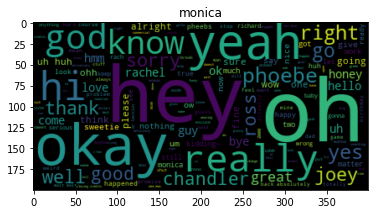

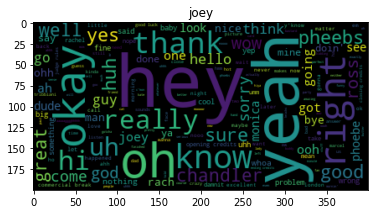

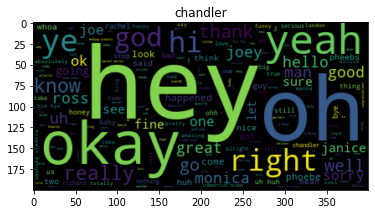

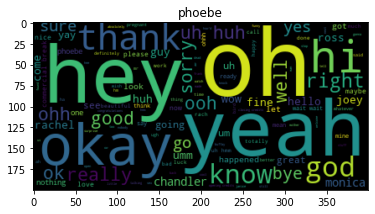

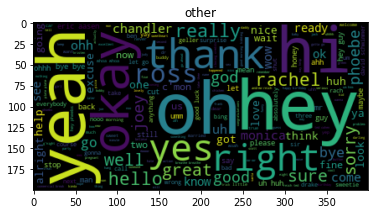

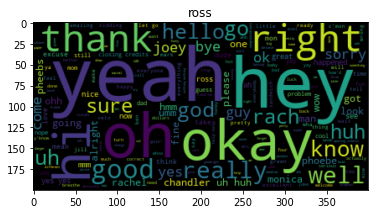

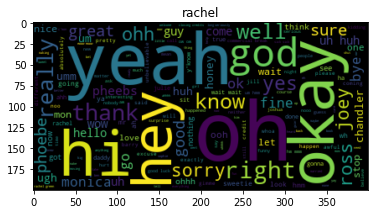

In [14]:

for i in df_dlg.label_str.unique():
    df_dlg0 = df_dlg[df_dlg['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
    text1 = ' '.join(df_dlg0[(df_dlg0['len_dialogue3']<5)&(df_dlg0.label_str==i)].dialogue2.tolist())
    wordcloud1 = WordCloud().generate(text1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(i)
    plt.show()
    
    

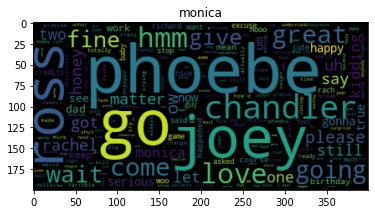

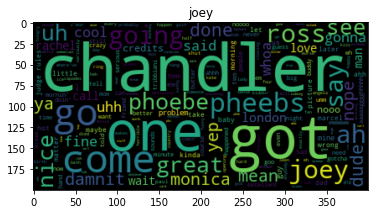

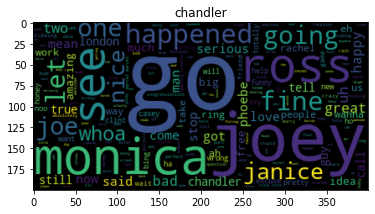

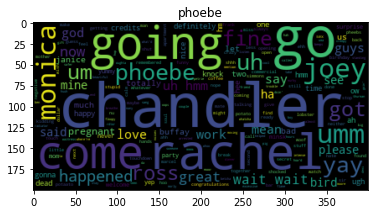

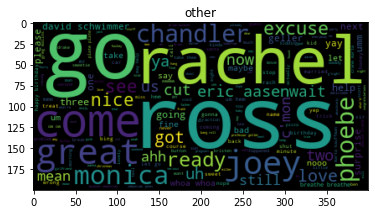

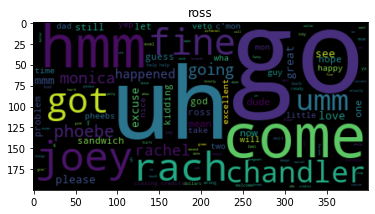

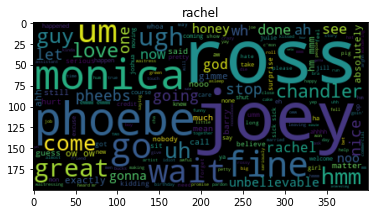

In [16]:
for i in df_dlg.label_str.unique():
    no_use_word1 = ['yeah','okay','hey','hi','oh','really','yes','hello','thanks','sure','ok','huh','wow','bye','thank','know','right','sorry','good','well']
    df_dlg0 = df_dlg[df_dlg['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
    text1 = ' '.join(df_dlg0[(df_dlg0['len_dialogue3']<5)&(df_dlg0.label_str==i)&(df_dlg0['dialogue3'].apply(lambda x: filt_word1(x,no_use_word1)))].dialogue2.tolist())
    wordcloud1 = WordCloud().generate(text1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(i)
    plt.show()

In [18]:
## filter first word
no_use_word1 = ['yeah','okay','hey','hi','oh','really','yes','hello','thanks','sure','ok','huh','wow','bye','thank','know','right','sorry','good','well']
df_dlg['filt1'] = ((df_dlg['dialogue3'].apply(lambda x: filt_word1(x,no_use_word1)))).astype(int)
df_dlg2 = df_dlg[df_dlg['filt1']==1]

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
XX=df_dlg2['len_dialogue3']
XX.describe()

count    50981.000000
mean        11.999980
std         11.015999
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        239.000000
Name: len_dialogue3, dtype: float64

<AxesSubplot:ylabel='Frequency'>

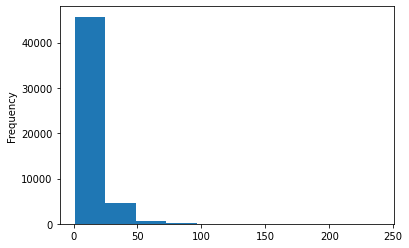

In [20]:
XX.plot(kind='hist')

In [21]:
np.percentile(XX,99)

53.0

<AxesSubplot:ylabel='Frequency'>

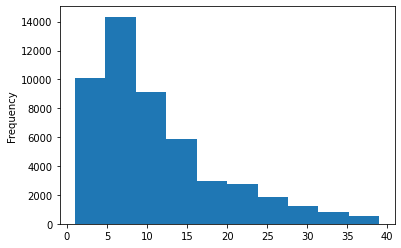

In [22]:
XX[XX<40].plot(kind='hist')

In [23]:
# df_dlg[df_dlg['len_dialogue2']>50]

In [24]:
df_dlg2 = df_dlg2[(df_dlg2['len_dialogue3']>0)&(df_dlg2['len_dialogue3']<50)][['dialogue3','label','eps','season']]
df_dlg2.columns = ['text','label','episode','season']
df_dlg2['ids'] = [i for i in range(len(df_dlg2))]

In [25]:
df_dlg2.head()

,text,label,episode,season,ids
0,there's nothing to tell he's just some guy i w...,3,0101,01,0
1,c'mon you're going out with the guy there's go...,5,0101,01,1
2,all right joey be nice so does he have a hump ...,4,0101,01,2
3,wait does he eat chalk,6,0101,01,3
4,just because i don't want her to go through wh...,6,0101,01,4


In [26]:
df_dlg2.shape

(50344, 5)

## Spliting

In [27]:
df_dlg2_seen=df_dlg2[df_dlg2['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
train_ids = df_dlg2_seen.sample(int(len(df_dlg2_seen)*0.75),random_state = 167).ids.tolist()
df_dlg2_seen['is_train'] = df_dlg2_seen.ids.isin(train_ids)
df_dlg2_unseen=df_dlg2[df_dlg2['season'].isin(['09', '10'])]

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df_dlg2_seen.head()

,text,label,episode,season,ids,is_train
0,there's nothing to tell he's just some guy i w...,3,0101,01,0,True
1,c'mon you're going out with the guy there's go...,5,0101,01,1,False
2,all right joey be nice so does he have a hump ...,4,0101,01,2,True
3,wait does he eat chalk,6,0101,01,3,False
4,just because i don't want her to go through wh...,6,0101,01,4,True


In [29]:
df_dlg2_unseen.head()

,text,label,episode,season,ids
49643,joey,1,0901,09,40421
49645,so uh i guess we should make it official huh,1,0901,09,40422
49646,uh look rach hey ross is here hey look it's my...,5,0901,09,40423
49649,hey and look he brought flowers thanks ross bu...,5,0901,09,40424
49650,you're weird today listen i uh wanted to talk ...,2,0901,09,40425


## Saving

In [30]:
df_dlg2_seen.to_csv('../../data/friends_seen_season.csv',index=False)
df_dlg2_unseen.to_csv('../../data/friends_unseen_season.csv',index=False)